In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import pyarrow.feather as feather

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
work_dir = "/Users/ho/Documents/LLD/AI/"

df = feather.read_feather(work_dir + "3y_mechul.feather")
df

,FKDAT,WEEKDAY,KUNNR,FKART,AUGRU_AUFT,MATNR,VRKME_x,SPART,FKIMG,FKLMG,...,MSTAE,MAXLZ,LZEIH,TEXT1,REG_DATE,REG_ID,CHG_DATE,CHG_ID,GEWEI,WEB_GB
0,2020-01-01,2,1806139,F2,901,770008,KG,02,6800.0,6800.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
1,2020-01-01,2,1806139,S1,901,770008,KG,02,-3400.0,-3400.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
2,2020-01-02,3,1806139,F2,901,770008,KG,02,6520.0,6520.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
3,2020-01-02,3,1806139,S1,901,770008,KG,02,-3260.0,-3260.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
4,2020-01-03,4,1806139,S1,901,770008,KG,02,-3060.0,-3060.0,...,,14,DAY,일수,2022-05-27 15:26:12.000,,2023-04-06 05:20:04.000,BATCH,KG,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873254,2022-12-27,1,1313795,F2,901,770201,KG,02,136.0,136.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873255,2022-12-28,2,1313795,F2,901,770201,KG,02,255.0,255.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873256,2022-12-29,3,1313795,F2,901,770201,KG,02,289.0,289.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,
873257,2022-12-30,4,1313795,F2,901,770201,KG,02,204.0,204.0,...,,72,H,시간,2023-01-11 17:34:24.000,BATCH,2023-01-28 05:20:01.000,BATCH,KG,


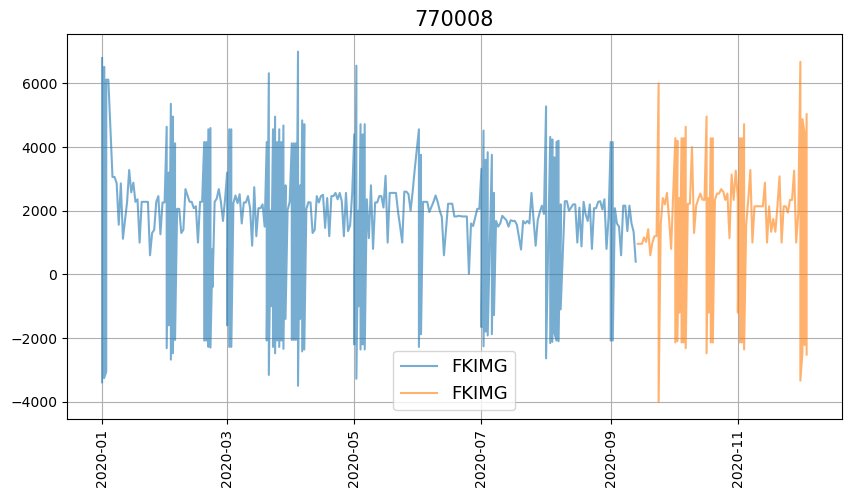

In [4]:
spot_ = 770008
data = df[df['MATNR']==spot_][['FKDAT', 'WEEKDAY', 'FKIMG']]

plt.figure(figsize=(10,5))
plt.title("770008", fontsize=15)
d_ = data.iloc[:300]
plt.plot(d_["FKDAT"], d_["FKIMG"], "-", label=str('FKIMG'), alpha=.6)
d_ = data.iloc[300:400]
plt.plot(d_["FKDAT"], d_["FKIMG"], "-", label=str('FKIMG'), alpha=.6)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()

In [8]:
data = df[df['MATNR']==770008][['FKDAT', 'WEEKDAY', 'FKIMG']]

training_set = data.iloc[:300, 2:3].values
test_set = data.iloc[300:400, 2:3].values

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 7 time-steps and 1 output
X_train = []
y_train = []

for i in range(7, 300):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
X_train

array([[[0.98095238],
        [0.00952381],
        [0.95428571],
        ...,
        [0.04190476],
        [0.91619048],
        [0.91619048]],

       [[0.00952381],
        [0.95428571],
        [0.02285714],
        ...,
        [0.91619048],
        [0.91619048],
        [0.6247619 ]],

       [[0.95428571],
        [0.02285714],
        [0.04190476],
        ...,
        [0.91619048],
        [0.6247619 ],
        [0.6247619 ]],

       ...,

       [[0.48571429],
        [0.47619048],
        [0.39047619],
        ...,
        [0.53904762],
        [0.46285714],
        [0.53904762]],

       [[0.47619048],
        [0.39047619],
        [0.53904762],
        ...,
        [0.46285714],
        [0.53904762],
        [0.48571429]],

       [[0.39047619],
        [0.53904762],
        [0.53904762],
        ...,
        [0.53904762],
        [0.48571429],
        [0.46095238]]])

In [6]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Metal device set to: Apple M1
Epoch 1/100


2023-05-19 14:17:47.270750: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 2s 51ms/step - loss: 0.2458
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.1319
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0533
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0550
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0421
Epoch 6/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0460
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0415
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0423
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0381
Epoch 10/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0412
Epoch 11/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0408
Epoch 12/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0414
Epoch 13/100
5/5 [==============================] - 0s 18ms/s

In [7]:
dataset_train = data.iloc[:300, 2:3]
dataset_test = data.iloc[300:400, 2:3]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(7, 100):
    X_test.append(inputs[i-7:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(93, 7, 1)


3/3 [==============================] - 1s 20ms/step


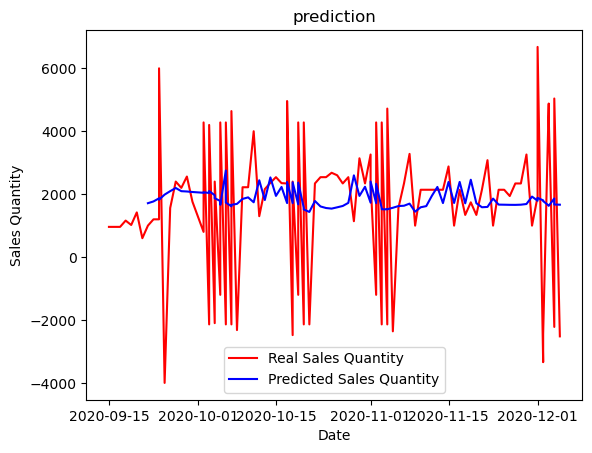

In [8]:
predicted_sales_quiantity = model.predict(X_test)
predicted_sales_quiantity = sc.inverse_transform(predicted_sales_quiantity)

# Visualising the results
plt.plot(data.loc[301:400, 'FKDAT'],dataset_test.values, color = 'red', label = 'Real Sales Quantity')
plt.plot(data.loc[308:400, 'FKDAT'],predicted_sales_quiantity, color = 'blue', label = 'Predicted Sales Quantity')
plt.title('prediction')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()